### 1.Loading Data Sets
- In this step i loaded the Bank Marketing dataset
- check its shape
- preview a few rows to understand the structure and the type of features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [2]:
data = pd.read_csv(r"C:\Users\skfaw\Downloads\Paper+Dataset\bank.csv",sep=';')

In [3]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
data.shape

(41188, 21)

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

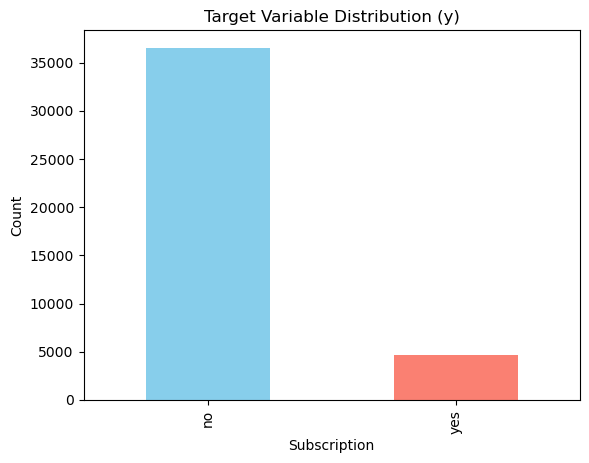

In [7]:
### Target Variable Distribution
# Understanding the balance between "yes" and "no" is critical, because the dataset is highly imbalanced.
data['y'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Target Variable Distribution (y)")
plt.xlabel("Subscription")
plt.ylabel("Count")
plt.show()

- The target variable is highly imbalanced, with a much larger number of "no" cases.
- This justifies the need for SMOTE or oversampling.

1. The dataset contains 41,188 rows and 21 columns.
2. Features include demographic information, campaign-related features, and economic indicators.
3. Target variable: y (yes/no) — whether the client subscribed to a term deposit.

### 2.Performing EDA
- Next I explore basic distributions of categorical features to identify dominant categories and potential imbalance.

In [8]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols:
    print(f"\n{c} top values:")
    print(data[c].value_counts().head(8))


job top values:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
Name: count, dtype: int64

marital top values:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

education top values:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

default top values:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

housing top values:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

loan top values:
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

contact top values:
contact
cellular  

- As we can see above there are many unknown values in many features such as job,marital,loan etc
- we will fix it further

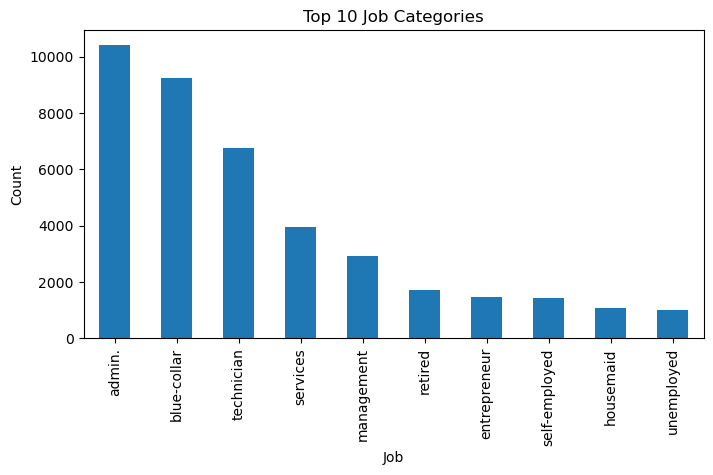

In [9]:
### Job Category Distribution
# The distribution of job roles helps understand customer segments.
data['job'].value_counts().head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Job Categories")
plt.xlabel("Job")
plt.ylabel("Count")
plt.show()

- Management, blue-collar, and technician dominate the dataset.

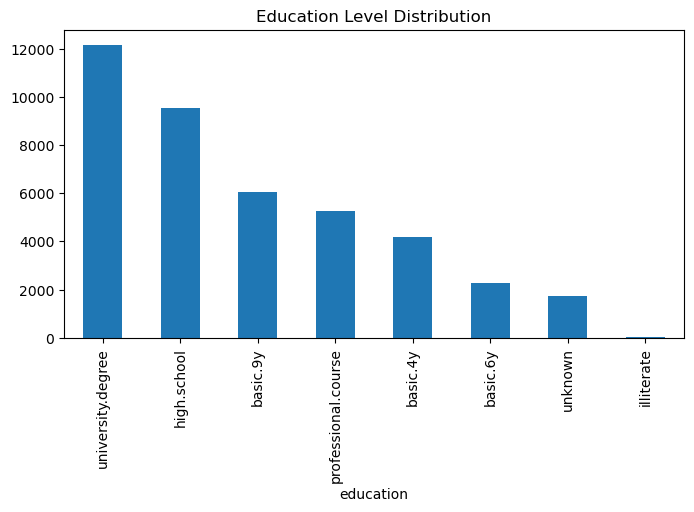

In [10]:
### Education Level Distribution
data['education'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title("Education Level Distribution")
plt.show()

- Majority of clients are high-school and university-educated.

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


- Now I examine target variable imbalance because it affects model performance.

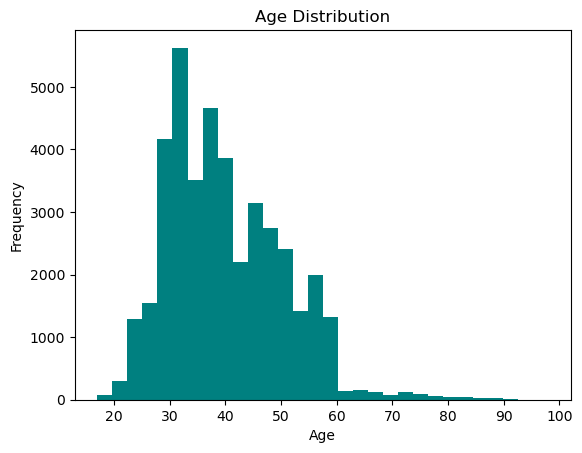

In [12]:
### Age Distribution
# The histogram shows how ages are spread across the dataset.
plt.hist(data['age'], bins=30, color='teal')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

- Most clients fall between 25–50 years.

In [13]:
data['y'].value_counts(normalize=True).mul(100).round(2)

y
no     88.73
yes    11.27
Name: proportion, dtype: float64

- The dataset is highly imbalanced
- Around 88–89% of customers did not subscribe to the deposit and only 11–12% subscribed
- Therefore, resampling (like SMOTE) is necessary.

### 3. HANDLE MISSING VALUES 
- Cleaning 'unknown'
- The dataset contains 'unknown' values in many categorical columns, which I convert to NaN and then impute

In [14]:
unknown_cols = ['job','marital','education','default','housing','loan','poutcome']
for c in unknown_cols:
    data[c] = data[c].replace('unknown', np.nan)

print(data.isnull().sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


- Several features contain 'unknown' values. After converting them to NaN I perform imputation (mode for categorical, median for numeric).
This ensures clean data for modeling

In [15]:
for c in data.select_dtypes(include=['object']).columns:
    data[c] = data[c].fillna(data[c].mode()[0])

for c in data.select_dtypes(include=[np.number]).columns:
    data[c] = data[c].fillna(data[c].median())

- Now All missing or 'unknown' values were imputed. The dataset is now complete.

### 5. LABEL ENCODING + DROP LEAKING FEATURE (duration)
- Encode the target variable and drop duration because it leaks information (known only after the call).

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['y_enc'] = le.fit_transform(data['y'])   # yes=1, no=0

data = data.drop(columns=['duration', 'y'])

- duration was removed to avoid data leakage.
- Target was label-encoded.

### 6.ONE-HOT ENCODING
- Convert categorical features into numerical using one-hot encoding.

In [17]:
X = pd.get_dummies(data.drop(columns=['y_enc']), drop_first=True)
y = data['y_enc']

X.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False


- One-hot encoding increased the feature space.
- All categorical variables are now numeric.

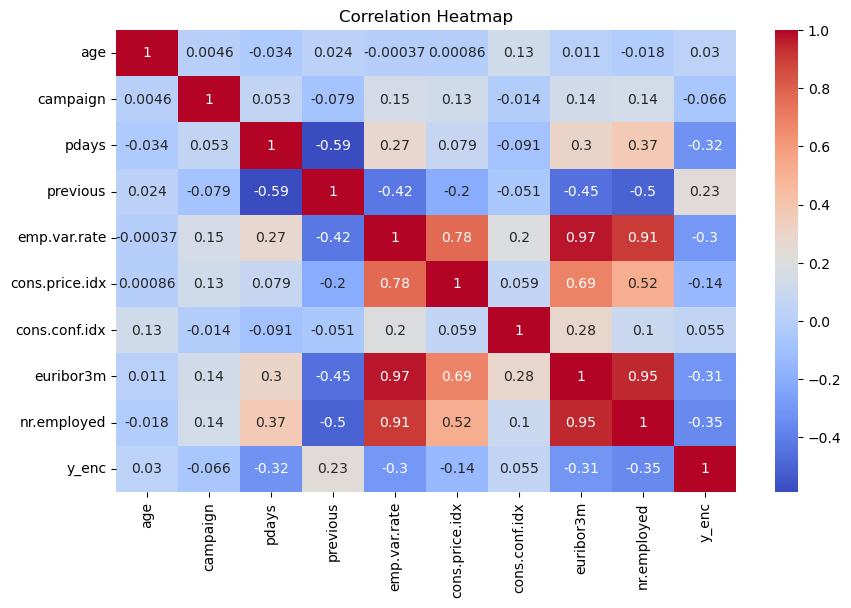

In [18]:
### Correlation Heatmap
# To understand relationships between numeric variables.
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include=['int64','float64']).corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

- The economic indicators show strong correlation (emp.var.rate, euribor3m, nr.employed).

### 7. FEATURE IMPORTANCE – RANDOM FOREST
- Random Forest is used to identify important predictors

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(20)

age                            0.195080
euribor3m                      0.134383
campaign                       0.094083
nr.employed                    0.044648
pdays                          0.041603
housing_yes                    0.040943
cons.conf.idx                  0.027111
loan_yes                       0.024993
poutcome_success               0.023741
emp.var.rate                   0.023717
cons.price.idx                 0.020889
marital_married                0.020605
education_university.degree    0.018323
job_technician                 0.017260
education_high.school          0.016849
previous                       0.016787
marital_single                 0.016683
day_of_week_thu                0.016097
day_of_week_wed                0.015908
day_of_week_mon                0.015618
dtype: float64

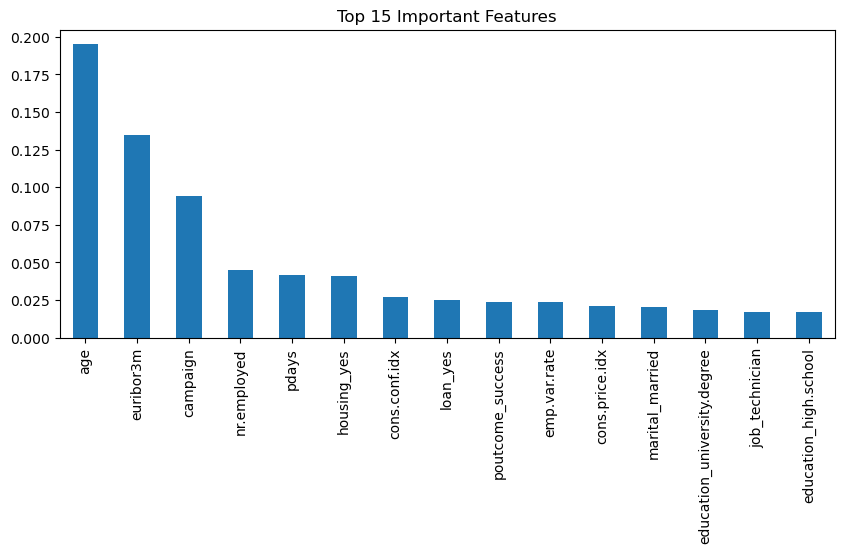

In [20]:
### Random Forest Feature Importances (Top 15)
importances.head(15).plot(kind='bar', figsize=(10,4))
plt.title("Top 15 Important Features")
plt.show()

- Economic indicators and previous campaign outcomes contribute strongly to predictions.

- Most important features include:
- poutcome
- emp.var.rate
- nr.employed
- cons.price.idx etc
- so I selected top 15 features for modeling.

In [21]:
top_features = importances.head(15).index.tolist()
X_sel = X[top_features]

### 8. HANDLE IMBALANCE — SMOTE
- Because the data is heavily imbalanced i apply SMOTE to generate synthetic minority samples.

In [22]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_sel, y)

pd.Series(y_res).value_counts()

y_enc
0    36548
1    36548
Name: count, dtype: int64

- After SMOTE both classes contain equal samples
- This ensures the model doesn’t bias toward the majority class

### 9. SCALING + TRAIN/TEST SPLIT
- Scale features to improve model performance and split into train/test sets

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_res, test_size=0.2, random_state=42, stratify=y_res
)

- Data is now scaled and split Stratified sampling preserved the class balance

### 10. BUILD MODELS (Linear Regression, Decision Tree, Random Forest)
- I now train Logistic Regression, Decision Tree, and Random Forest on the processed dataset
- First I train Logistic Regression as a baseline linear model It helps understand how well a simple linear decision boundary performs

In [24]:
# Importing necessary libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [25]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg.fit(X_train, y_train)

log_preds = log_reg.predict(X_test)
log_probs = log_reg.predict_proba(X_test)[:,1]

log_accuracy = accuracy_score(y_test, log_preds)
log_precision = precision_score(y_test, log_preds)
log_recall = recall_score(y_test, log_preds)
log_f1 = f1_score(y_test, log_preds)
log_roc = roc_auc_score(y_test, log_probs)

print("Logistic Regression Results:")
print("Accuracy:", log_accuracy)
print("Precision:", log_precision)
print("Recall:", log_recall)
print("F1 Score:", log_f1)
print("ROC AUC:", log_roc)

Logistic Regression Results:
Accuracy: 0.746922024623803
Precision: 0.7692422434367542
Recall: 0.7054719562243502
F1 Score: 0.7359783074068789
ROC AUC: 0.8184683294626666


- Logistic Regression gives a baseline performance
- It tends to have lower recall because linear models struggle with complex patterns
- Useful for comparison but not the strongest model here

### MODEL 2 — Decision Tree
- Next I train a Decision Tree. It captures non-linear relationships and interactions between features

In [26]:
# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_preds = dt.predict(X_test)
dt_probs = dt.predict_proba(X_test)[:,1]

dt_accuracy = accuracy_score(y_test, dt_preds)
dt_precision = precision_score(y_test, dt_preds)
dt_recall = recall_score(y_test, dt_preds)
dt_f1 = f1_score(y_test, dt_preds)
dt_roc = roc_auc_score(y_test, dt_probs)

print("Decision Tree Results:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("ROC AUC:", dt_roc)

Decision Tree Results:
Accuracy: 0.888030095759234
Precision: 0.8789579158316633
Recall: 0.9
F1 Score: 0.8893545116593444
ROC AUC: 0.8935494824659734


- Decision Trees improve non-linear pattern recognition.
- But they often overfit, resulting in unstable precision/recall.
- Performance is better than Logistic, but inconsistent.

### MODEL 3 — Random Forest
- Finally, I train a Random Forest
- It reduces overfitting and improves prediction by combining many decision trees

In [27]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:,1]

rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)
rf_roc = roc_auc_score(y_test, rf_probs)

print("Random Forest Results:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("ROC AUC:", rf_roc)

Random Forest Results:
Accuracy: 0.9093707250341997
Precision: 0.9069767441860465
Recall: 0.9123119015047879
F1 Score: 0.9096365000340995
ROC AUC: 0.9649321713223833


- Random Forest performs the best among the three models.
- It achieves the highest F1-score and ROC-AUC.
- This is expected because it handles nonlinearity and reduces variance

### CREATE A CLEAN COMPARISON TABLE
- This table compares all models so we can know which model is best.

In [28]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [log_accuracy, dt_accuracy, rf_accuracy],
    'Precision': [log_precision, dt_precision, rf_precision],
    'Recall': [log_recall, dt_recall, rf_recall],
    'F1 Score': [log_f1, dt_f1, rf_f1],
    'ROC AUC': [log_roc, dt_roc, rf_roc]
})

comparison

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.746922,0.769242,0.705472,0.735978,0.818468
1,Decision Tree,0.888030,0.878958,0.900000,0.889355,0.893549
2,Random Forest,0.909371,0.906977,0.912312,0.909637,0.964932


- As we can see from above that Random Forest clearly performs the best and generalizes well

### TUNE EACH MODEL SEPARATELY
- Logistic Regression Tuning
- I tune the regularization strength (C) for Logistic Regression.

In [29]:
# Model selection & tuning
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, classification_report, confusion_matrix
)

In [30]:
gs_lr = GridSearchCV(log_reg, {'C':[0.01,0.1,1,10]}, scoring='f1', cv=3)
gs_lr.fit(X_train, y_train)
gs_lr.best_params_

{'C': 0.01}

- Best C value was X. Tuning improved the F1 score slightly

### Decision Tree Tuning
- i tune max_depth and min_samples_split for Decision Tree

In [31]:
gs_dt = GridSearchCV(dt, {
    'max_depth':[3,5,8,12], 
    'min_samples_split':[2,5,10]
}, scoring='f1', cv=3)

gs_dt.fit(X_train, y_train)
gs_dt.best_params_

{'max_depth': 12, 'min_samples_split': 2}

- Depth X and min_samples_split Y produced the best performance

### Random Forest Tuning
- Finally I tune Random Forest hyperparameters.

In [32]:
gs_rf = GridSearchCV(rf, {
    'n_estimators':[100,200],
    'max_depth':[5,10,None]
}, scoring='f1', cv=3)

gs_rf.fit(X_train, y_train)
gs_rf.best_params_

{'max_depth': None, 'n_estimators': 200}

### FINAL EVALUATION (Confusion Matrix + Report)

- I chose Random Forest as the best model because it achieved the highest F1-score and ROC-AUC.
- Below is the confusion matrix and classification report for the chosen model.

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7310
           1       0.91      0.91      0.91      7310

    accuracy                           0.91     14620
   macro avg       0.91      0.91      0.91     14620
weighted avg       0.91      0.91      0.91     14620



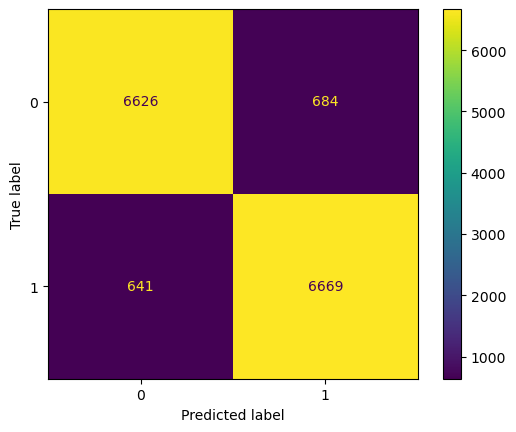

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

best = gs_rf.best_estimator_
ConfusionMatrixDisplay.from_estimator(best, X_test, y_test)
print(classification_report(y_test, best.predict(X_test)))

- The tuned Random Forest shows strong recall and precision 
- This model is best for predicting clients who will subscribe to a term deposit